In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('results_no_mm.csv')
df.describe()

,run_id,step,mid_price,spread,bid_depth_5,ask_depth_5,agent_wealth,agent_inventory
count,100000.000000,100000.000000,12270.000000,12270.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,24.500000,499.500000,100.003968,0.110258,22.293780,3.857780,100280.167310,47.49459
std,14.430942,288.676434,0.340826,0.095435,25.226724,4.201691,19006.408179,196.82691
min,0.000000,0.000000,98.775000,0.010000,0.000000,0.000000,39910.010000,-512.00000
25%,12.000000,249.750000,99.721250,0.040000,0.000000,0.000000,90574.380000,-72.00000
50%,24.500000,499.500000,100.005000,0.080000,14.500000,5.000000,100682.820000,26.00000
75%,37.000000,749.250000,100.285000,0.150000,40.000000,6.000000,109459.870000,132.00000
max,49.000000,999.000000,101.145000,0.720000,99.000000,33.000000,161425.840000,703.00000


In [40]:
mm = pd.read_csv('results_with_mm.csv')
mm.describe()

,run_id,step,mid_price,spread,bid_depth_5,ask_depth_5,agent_wealth,agent_inventory
count,150000.000000,150000.000000,20427.000000,20427.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,24.500000,499.500000,99.959027,0.108772,15.840820,4.620840,232355.050762,43.305967
std,14.430918,288.675953,0.324723,0.093172,21.345389,4.085598,189802.844632,160.899272
min,0.000000,0.000000,98.685000,0.010000,0.000000,0.000000,37835.950000,-483.000000
25%,12.000000,249.750000,99.700000,0.040000,0.000000,0.000000,97114.630000,-16.000000
50%,24.500000,499.500000,99.935000,0.080000,0.000000,5.000000,107759.020000,0.000000
75%,37.000000,749.250000,100.225000,0.150000,30.000000,7.000000,500000.000000,80.000000
max,49.000000,999.000000,101.240000,0.780000,92.000000,46.000000,500000.000000,724.000000


## Violin plots comparing metrics between runs without market maker (df) and with market maker (mm)

The cells below create violin plots for the metrics: `mid_price`, `spread`, `bid_depth_5`, `ask_depth_5`, `agent_wealth`, `agent_inventory`.
If any column is missing in either dataframe the code will skip it and print a warning.

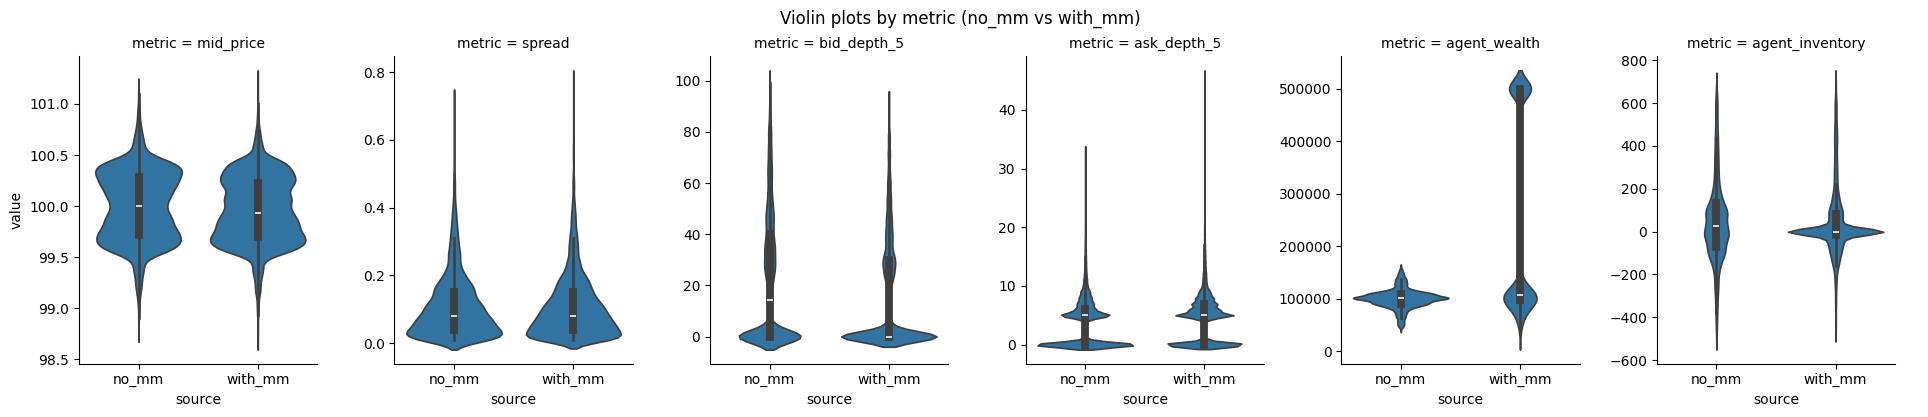

In [41]:
# Combined violin plots (faceted by metric) using seaborn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# list of metrics to compare
metrics = ['mid_price', 'spread', 'bid_depth_5', 'ask_depth_5', 'agent_wealth', 'agent_inventory']

# helper to gather data for seaborn: create a long-form dataframe with columns ['metric','value','source']
def make_long(df_in, label):
    import pandas as _pd
    rows = []
    for m in metrics:
        if m in df_in.columns:
            vals = df_in[m].dropna().values
            rows.extend([{'metric': m, 'value': float(v), 'source': label} for v in vals])
        else:
            print(f'Warning: column {m} not found in', label)
    return _pd.DataFrame(rows)

# build long-form dataframes
long_df = make_long(df, 'no_mm')
long_mm = make_long(mm, 'with_mm')

import pandas as pd
combined = pd.concat([long_df, long_mm], ignore_index=True)

# Combined violin plot (all metrics as facets)
if combined.empty:
    print('No data available for the selected metrics.')
else:
    g = sns.catplot(data=combined, x='source', y='value', col='metric', kind='violin', sharey=False, height=4, aspect=0.8)
    g.fig.suptitle('Violin plots by metric (no_mm vs with_mm)', y=1.03)
    plt.show()


In [42]:
mm_data = mm[mm['agent_id'] == 'market_maker_1']
mm_data.head()
# sns.violinplot(mm_data['agent_wealth'])
mm_data.describe()

,run_id,step,mid_price,spread,bid_depth_5,ask_depth_5,agent_wealth,agent_inventory
count,50000.000000,50000.000000,6809.000000,6809.000000,50000.000000,50000.000000,50000.0,50000.0
mean,24.500000,499.500000,99.959027,0.108772,15.840820,4.620840,500000.0,0.0
std,14.431014,288.677877,0.324739,0.093177,21.345531,4.085625,0.0,0.0
min,0.000000,0.000000,98.685000,0.010000,0.000000,0.000000,500000.0,0.0
25%,12.000000,249.750000,99.700000,0.040000,0.000000,0.000000,500000.0,0.0
50%,24.500000,499.500000,99.935000,0.080000,0.000000,5.000000,500000.0,0.0
75%,37.000000,749.250000,100.225000,0.150000,30.000000,7.000000,500000.0,0.0
max,49.000000,999.000000,101.240000,0.780000,92.000000,46.000000,500000.0,0.0


In [43]:
noisy_data = mm[mm['agent_id'] == 'noise_trader_1']
noisy_data.describe()

,run_id,step,mid_price,spread,bid_depth_5,ask_depth_5,agent_wealth,agent_inventory
count,50000.000000,50000.000000,6809.000000,6809.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,24.500000,499.500000,99.959027,0.108772,15.840820,4.620840,94950.938813,151.455240
std,14.431014,288.677877,0.324739,0.093177,21.345531,4.085625,23036.643342,230.492712
min,0.000000,0.000000,98.685000,0.010000,0.000000,0.000000,37835.950000,-483.000000
25%,12.000000,249.750000,99.700000,0.040000,0.000000,0.000000,79543.190000,24.000000
50%,24.500000,499.500000,99.935000,0.080000,0.000000,5.000000,97414.710000,126.000000
75%,37.000000,749.250000,100.225000,0.150000,30.000000,7.000000,107650.140000,306.000000
max,49.000000,999.000000,101.240000,0.780000,92.000000,46.000000,158507.820000,724.000000


In [44]:
agent_data = pd.read_csv('agent_data_no_mm.csv')
agent_data.describe()

,step,inventory,cash,wealth,sim_id
count,2.555100e+06,2.555100e+06,2.555100e+06,2.555100e+06,2.555100e+06
mean,2.500000e+02,8.666197e-03,-1.935944e+01,-1.069359e+01,2.450000e+01
std,1.446260e+02,2.136533e+00,2.136611e+03,1.191586e+01,1.443087e+01
min,0.000000e+00,-1.200000e+01,-8.054000e+03,-1.320000e+02,0.000000e+00
25%,1.250000e+02,-1.000000e+00,-1.009000e+03,-1.800000e+01,1.200000e+01
50%,2.500000e+02,0.000000e+00,0.000000e+00,-7.000000e+00,2.450000e+01
75%,3.750000e+02,1.000000e+00,9.950000e+02,0.000000e+00,3.700000e+01
max,5.000000e+02,8.000000e+00,1.193400e+04,5.000000e+01,4.900000e+01


In [45]:
agent_data_wmm = pd.read_csv('agent_data_with_mm.csv')
agent_data_wmm.describe()

,step,inventory,cash,wealth,sim_id
count,2.555100e+06,2.555100e+06,2.555100e+06,2.555100e+06,2.555100e+06
mean,2.500000e+02,-3.612970e-02,2.555750e+01,-1.057231e+01,2.450000e+01
std,1.446260e+02,3.061856e+00,3.061889e+03,1.294986e+02,1.443087e+01
min,0.000000e+00,-3.000000e+01,-3.624300e+04,-4.560000e+02,0.000000e+00
25%,1.250000e+02,-2.000000e+00,-1.045000e+03,-2.600000e+01,1.200000e+01
50%,2.500000e+02,0.000000e+00,0.000000e+00,-1.100000e+01,2.450000e+01
75%,3.750000e+02,1.000000e+00,1.950000e+03,-2.000000e+00,3.700000e+01
max,5.000000e+02,3.600000e+01,2.980000e+04,3.302000e+03,4.900000e+01


In [46]:
mm_data = agent_data_wmm[agent_data_wmm['trader_id'] == 'MM']
mm_data.describe()

,step,inventory,cash,wealth,sim_id
count,25050.000000,25050.000000,25050.000000,25050.000000,25050.000000
mean,250.000000,0.858323,153.355449,1011.677745,24.500000
std,144.628841,0.747978,1236.177091,740.378235,14.431158
min,0.000000,-1.000000,-1999.000000,-7.000000,0.000000
25%,125.000000,1.000000,-711.000000,414.000000,12.000000
50%,250.000000,1.000000,-97.000000,867.000000,24.500000
75%,375.000000,1.000000,722.000000,1469.000000,37.000000
max,500.000000,2.000000,4302.000000,3302.000000,49.000000
